In [1]:
import gym
import numpy as np
from DQN import Agent
from disc_env import DiffDriveEnv
from utils import plotLearning

def convert_observation(dictonary):
    observation = np.zeros(6, dtype=np.float32)
    observation[0:5] = np.concatenate([dictonary['agent'], 
                                       dictonary['target']])
    observation[5] = dictonary['time']
    return observation

env = DiffDriveEnv()
#     env.render_mode = "human"
get = ['agent', 'target', 'time']

agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[6], lr=0.003)


episode  0 score -50.01 average score -50.01 epsilon 1.00
episode  50 score -50.51 average score -52.45 epsilon 0.01
episode  100 score -50.02 average score -51.41 epsilon 0.01
episode  150 score -50.00 average score -50.17 epsilon 0.01
episode  200 score -50.01 average score -50.03 epsilon 0.01
episode  250 score -50.00 average score -50.02 epsilon 0.01
episode  300 score -52.81 average score -45.29 epsilon 0.01
episode  350 score -53.39 average score -34.05 epsilon 0.01
episode  400 score 99.43 average score -18.80 epsilon 0.01
episode  450 score -50.53 average score -15.32 epsilon 0.01
episode  500 score -51.59 average score -21.86 epsilon 0.01
episode  550 score -51.42 average score -23.20 epsilon 0.01
episode  600 score -50.33 average score -13.21 epsilon 0.01
episode  650 score -59.26 average score -16.28 epsilon 0.01
episode  700 score -50.00 average score -33.65 epsilon 0.01
episode  750 score -50.25 average score -25.45 epsilon 0.01
episode  800 score -50.64 average score -22.

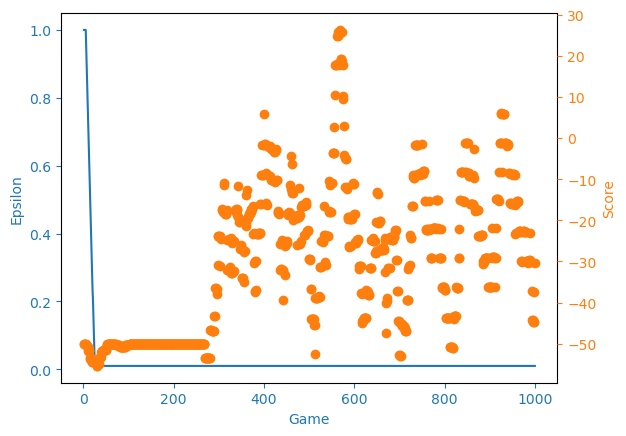

In [2]:
scores, eps_history = [], []
n_games = 1000
env.render_mode = None
for i in range(n_games):
    observation = np.zeros(6, dtype=np.float32)
    score = 0
    done = False
    observation, info = env.reset()     
    observation = convert_observation(observation)
#         for _ in range(50):
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        observation_ = convert_observation(observation_)
#             score += reward 
        agent.store_transition(observation, action, reward, 
                                observation_, done)
        agent.learn()
        observation = observation_
    scores.append(reward)
    eps_history.append(agent.epsilon)

    avg_score = np.mean(scores[-100:])
    if i % 50 == 0:
        print('episode ', i, 'score %.2f' % reward,
                'average score %.2f' % avg_score,
                'epsilon %.2f' % agent.epsilon)
x = [i+1 for i in range(n_games)]
filename = 'score.png'
plotLearning(x, scores, eps_history, filename)

In [3]:
env.render_mode = "human"
observation, info = env.reset() 

In [4]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info = env.step(action)